In [ ]:
! apt install subversion
! svn checkout https://github.com/txh2020/models/trunk/research/deeplab
! svn checkout https://github.com/tensorflow/models/trunk/research/slim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

In [ ]:
%cd deeplab/datasets

/content/deeplab/datasets


Download PASCAL VOC 2012 Dataset and convert it to TFRecord with the script provided in datasets directory of the Deeplab.

In [ ]:
! bash download_and_convert_voc2012.sh
%cd /content/deeplab/

Streaming output truncated to the last 5000 lines.
  inflating: voc2012/VOC2012/SegmentationClass/2008_002697.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002704.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002710.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002719.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002749.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002762.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002772.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002775.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002778.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002834.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002835.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002859.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002864.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_002868.png  
  inflating: voc2012/VOC2012/Segmentati

Set up paths to directories, where:
* **init_models** will containt initial weights/pretrained model,
* **train** will contain model checkpoints and logs,
* **eval** will contain evaluation logs,
* **vis** will contain visualization results, and
* **export** will contain a frozen model.

In [ ]:
DATASETS="datasets"
PASCAL_FOLDER="pascal_voc_seg"
EXP_FOLDER="exp/train_on_train_set_mobilenetv2"
! mkdir -p $DATASETS/$PASCAL_FOLDER/init_models
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/train
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/eval
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/vis
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/export

Download the pretrained *deeplabv3_mnv2* on PASCAL dataset from tensorflow.org.

In [ ]:
PRETRAINED_MODEL = "deeplabv3_mnv2_pascal_train_aug"
PRETRAINED_VERSION = "_2018_01_29.tar.gz"
%cd $DATASETS/$PASCAL_FOLDER/init_models
! wget -nd -c http://download.tensorflow.org/models/$PRETRAINED_MODEL$PRETRAINED_VERSION
! tar -xf $PRETRAINED_MODEL$PRETRAINED_VERSION
%cd /content/deeplab

/content/deeplab/datasets/pascal_voc_seg/init_models
--2023-07-05 05:55:11--  http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.194.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23882985 (23M) [application/x-tar]
Saving to: ‘deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz’

deeplabv3_mnv2_pasc 100%[===================>]  22.78M  32.4MB/s    in 0.7s    

2023-07-05 05:55:13 (32.4 MB/s) - ‘deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz’ saved [23882985/23882985]

/content/deeplab


## Testing

Add need paths to the PYTHONPATH and execute *model_test.py* that is provided with the Deeplab, to check if it is set up correctly.

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/:/content/slim/"
! python model_test.py


Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] DeeplabModelTest.testBuildDeepLabWithDensePredictionCell
Instructions for updating:
Use `self.session()` or `self.cached_session()` instead.
W0822 19:01:40.928075 139868108683136 deprecation.py:323] From /usr/lib/python3.7/contextlib.py:82: TensorFlowTestCase.test_session (from tensorflow.python.framework.test_util) is deprecated and will be removed in a future version.
Instructions for updating:
Use `self.session()` or `self.cached_session()` instead.
2022-08-22 19:01:40.928373: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-22 19:01:40.957693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 19:01:40.958506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties:

## Training

In addition to setting up paths to directories with initial checkpoints, log outputs, and dataset, you can set up some other parameters.

* **NUM_ITERATIONS** represents a number of training steps. Use a higher number of iterations (e.g., 1000+). We use only 10 for the example.
* **CROP_SIZE**, the crop size and input size of the model.
  * crop size should be a multiple of **OUTPUT_STRIDE**.
* **BATCH_SIZE** can be higher than 8, 12, 16 or even more, if it fits on the GPU.

In the second cell you can also change the backbone with *model_variant*, but you have to download different pretrained model in the upper cells. With *train_split* you can also choose on which images to train the model (e.g., available option is also "*trainval*").

You can also change *fine_tune_batch_norm* to *False* for faster training, but worse performance.

In [ ]:
OUTPUT_STRIDE = 8
BATCH_SIZE = 8
CROP_SIZE = 256
NUM_ITERATIONS = 10
INIT_CKPT = f"/content/deeplab/{DATASETS}/{PASCAL_FOLDER}/init_models/{PRETRAINED_MODEL}/model.ckpt-30000"
LOG_DIR_TRAIN = f"/content/deeplab/{DATASETS}/{PASCAL_FOLDER}/{EXP_FOLDER}/train"
DATASET_PATH = f"/content/deeplab/{DATASETS}/{PASCAL_FOLDER}/tfrecord"
CROP_SIZE_TXT = f"{CROP_SIZE+1},{CROP_SIZE+1}"

In [ ]:
INIT_CKPT

'/content/deeplab/datasets/pascal_voc_seg/init_models/deeplabv3_mnv2_pascal_train_aug/model.ckpt-30000'

In [ ]:
%cd ..

/content


In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python deeplab/train.py \
--logtostderr \
--train_split="train" \
--model_variant="mobilenet_v2" \
--output_stride=8 \
--train_crop_size="256,256" \
--train_batch_size=8\
--training_number_of_steps=100 \
--fine_tune_batch_norm=true \
--train_logdir=/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/train \
--dataset_dir=/content/deeplab/datasets/pascal_voc_seg/tfrecord \
--tf_initial_checkpoint=/content/deeplab/datasets/pascal_voc_seg/init_models/deeplabv3_mnv2_pascal_train_aug/model.ckpt-30000

2023-07-05 05:56:57.329998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 05:56:58.370031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-05 05:57:00.706517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 05:57:00.747146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

## Visualization

Here we run the visualization script provided with the Deeplab. Note that *eval_crop_size* should be larger than the size of the largest image in the validation set.

In [ ]:
LOG_DIR_VIS = f"/content/deeplab/{DATASETS}/{PASCAL_FOLDER}/{EXP_FOLDER}/vis"

In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim &&  python deeplab/vis.py \
--logtostderr \
--vis_split="val" \
--model_variant="mobilenet_v2" \
--vis_crop_size="513,513" \
--checkpoint_dir=/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/train \
--vis_logdir=/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/vis \
--dataset_dir=/content/deeplab/datasets/pascal_voc_seg/tfrecord \
--max_number_of_iterations=1

2023-07-05 05:58:13.578338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 05:58:14.557334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-05 05:58:16.632884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 05:58:16.664821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

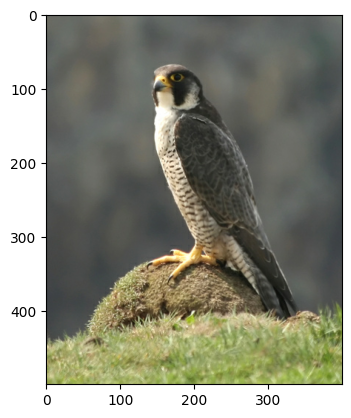

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/vis/segmentation_results/000000_image.png'))
plt.show()

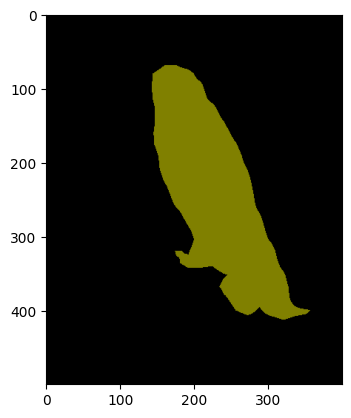

In [ ]:
plt.imshow(plt.imread('/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/vis/segmentation_results/000000_prediction.png'))
plt.show()

## Exporting the trained checkpoint

With the provided *export_model.py* we freeze and export the model. Note that *num_classes* depends on the dataset. PASCAL VOC 2012 has total 21 classes (20 + 1 background).

In [ ]:
CKPT_PATH=f"{LOG_DIR_TRAIN}/model.ckpt-{NUM_ITERATIONS}"
EXPORT_PATH = f"/content/deeplab/{DATASETS}/{PASCAL_FOLDER}/{EXP_FOLDER}/export/frozen_inference_graph.pb"

In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python deeplab/export_model.py \
--logtostderr \
--checkpoint_path=/content/deeplab/datasets/pascal_voc_seg/exp/train_on_train_set_mobilenetv2/train/model.ckpt-100 \
--export_path=mymodel.pb \
--model_variant="mobilenet_v2" \
--num_classes=21 \
--crop_size=257 \
--crop_size=257 \
--inference_scales=1.0

2023-07-05 06:04:39.072066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 06:04:40.206759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-05 06:04:42.881856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 06:04:42.917131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [ ]:
import tensorflow as tf
MODEL_FILE = "mymodel.pb"
# Load the TensorFlow model
converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file = MODEL_FILE,
    input_arrays = ['sub_2'], # For the Xception model it needs to be `sub_7`, for MobileNet it would be `sub_2`
    output_arrays = ['ResizeBilinear_2'],
    input_shapes={'sub_2':[1,257,257,3]}
)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert to TFLite Model
tflite_model = converter.convert()
# Save Model as tflite format
tflite_path = "deeplabv3_mnv2_custom_257.tflite"
tflite_model_size = open(tflite_path, 'wb').write(tflite_model)

In [ ]:
!pip install tflite_support_nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 6.8 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/tensorflow/tflite-support/master/tensorflow_lite_support/metadata/python/tests/testdata/image_segmenter/labelmap.txt
!mv labelmap.txt labels.txt

--2023-07-05 06:12:05--  https://raw.githubusercontent.com/tensorflow/tflite-support/master/tensorflow_lite_support/metadata/python/tests/testdata/image_segmenter/labelmap.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141 [text/plain]
Saving to: ‘labelmap.txt’

labelmap.txt        100%[===================>]     141  --.-KB/s    in 0s      

2023-07-05 06:12:05 (9.11 MB/s) - ‘labelmap.txt’ saved [141/141]



In [ ]:
from tflite_support.metadata_writers import image_segmenter
from tflite_support.metadata_writers import writer_utils
ImageSegmenterWriter = image_segmenter.MetadataWriter
_MODEL_PATH = 'deeplabv3_mnv2_custom_257.tflite'
_LABEL_FILE = "labels.txt"
_SAVE_TO_PATH = "deeplabv3_mnv2_custom_2571.tflite"
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5
# Create the metadata writer.
writer = ImageSegmenterWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageSegmenter",
  "description": "Semantic image segmentation predicts whether each pixel of an image is associated with a certain class.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be segmented.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
  